# Trabajo Práctico 2
Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

## Cálculo de gradientes

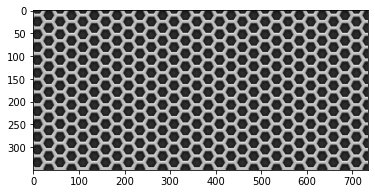

In [3]:
img_orig = cv.imread('./img/metalgrid.jpeg')
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap ='gray')

### Cálculo de gradiente en X e Y. Cálculo de Direcciones.

In [4]:
def calculate_gradients(input_img: np.ndarray):
    # Aplicamos Sobelx en 'float64' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(input_img,cv.CV_64F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # Aplicamos Sobelx en 'float64' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobely_64 = cv.Sobel(input_img,cv.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)

    return mag, angle


In [5]:
test_mag, test_angle = calculate_gradients(img_gray)

In [6]:
print(img_gray.shape)
print(test_mag.shape)
print(test_angle.shape)

(350, 735)
(350, 735)
(350, 735)


Text(0.5, 1.0, 'Angle')

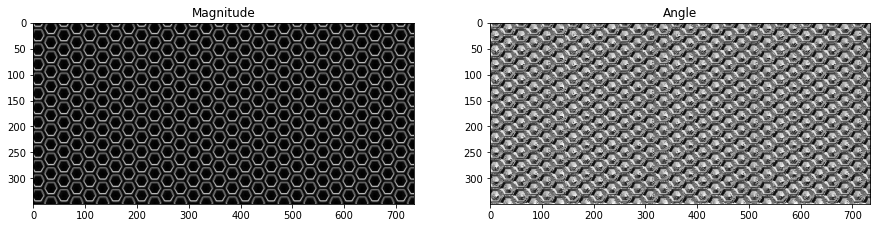

In [7]:
# Imágen de módulo y ángulo
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(test_mag, cmap='gray')
axs[0].set_title('Magnitude')
axs[1].imshow(test_angle, cmap='gray')
axs[1].set_title('Angle')

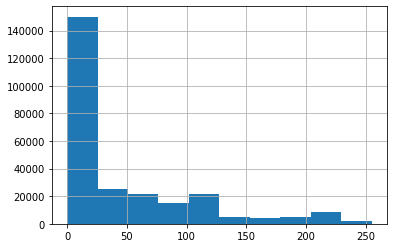

In [8]:
hist = plt.hist(test_mag.ravel(), density=False, label="Data")
plt.grid()

In [9]:
x_perc = np.percentile(test_mag, 95)

In [10]:
test_mag_90_mask = test_mag > x_perc
test_mag_90_mask.shape

(350, 735)

In [11]:
test_ang_mask = test_angle * test_mag_90_mask
np.unique(test_angle * test_mag_90_mask)

array([  0.        ,  25.67845182,  26.2242343 , ..., 154.92996632,
       155.23894394, 155.61944301])

Text(0.5, 1.0, 'Angle')

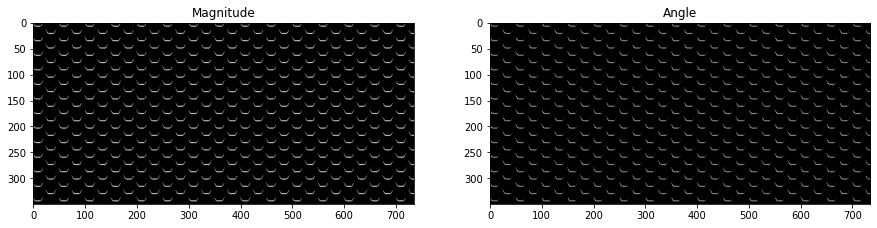

In [12]:
# Imágen de módulo y ángulo
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(test_mag * test_mag_90_mask, cmap='gray')
axs[0].set_title('Magnitude')
axs[1].imshow(test_angle * test_mag_90_mask, cmap='gray')
axs[1].set_title('Angle')

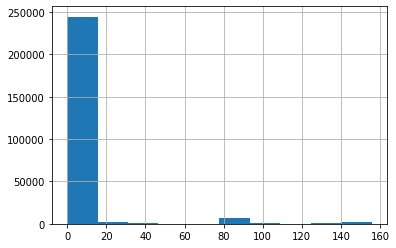

In [13]:
hist_mask = plt.hist(test_ang_mask.ravel(), density=False, label="Data")
plt.grid()

In [14]:
hist, bins = np.histogram(test_ang_mask.ravel(), bins=12, range=(0.0, 180.0))
print(hist)
print(bins)

[244393   1019   1034    363      0   3557   4024     42    375   1227
   1216      0]
[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180.]


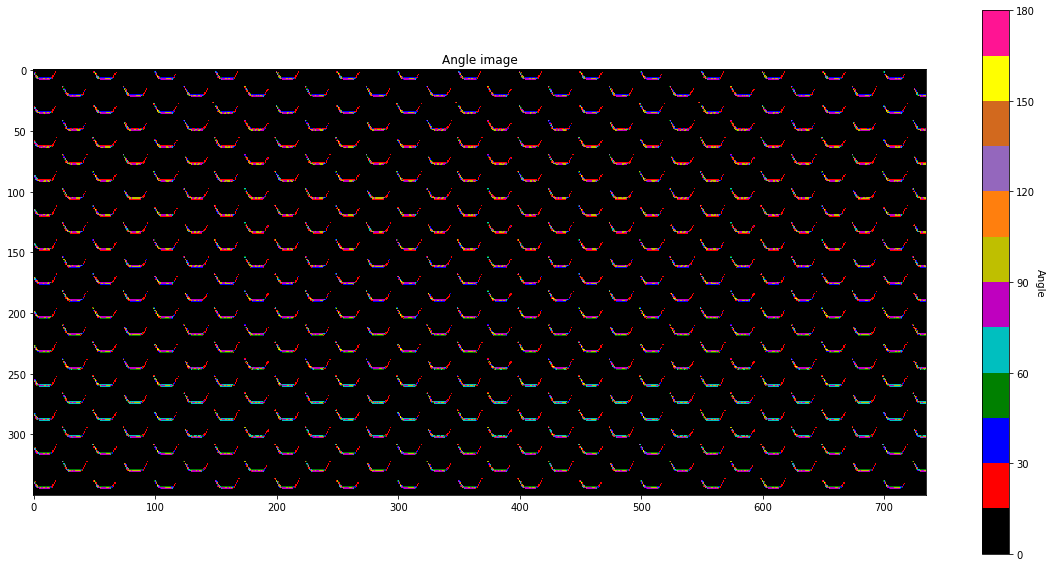

In [15]:
bounds = bins
colors = ["k", "r", "b", "g", "c", "m", "y", "tab:orange", "tab:purple", "chocolate", "yellow", "deeppink"]

plt.figure(figsize=(20,10))
plt.title("Angle image")

cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

#rect = plt.scatter(x, y, s = 100, c=z, cmap=cmap, norm=norm)
rect = plt.imshow(test_ang_mask, cmap=cmap, norm=norm)

cbar = plt.colorbar(rect, spacing="proportional")
cbar.set_label('Angle', rotation=270, labelpad=10)